* author: chencanyi

In [1]:
options("repos" = c(CRAN="https://mirrors.tuna.tsinghua.edu.cn/CRAN/"))
# install.packages("LaplacesDemon")

# Hierarchcal model

In [2]:
library(LaplacesDemon)
Mode <-  function(x){ 
    ta = table(x)
    tam = max(ta)
    if (all(ta == tam))
         mod = NA
    else
         if(is.numeric(x))
    mod = as.numeric(names(ta)[ta == tam])
    else
         mod = names(ta)[ta == tam]
    return(mod)
}


y <- matrix(c(83,92,92,46,67,117,109,114,104,87,101,93,92,86,67,105
              ,119,116,102,116,79,97,103,79,92,57,92,104,77,100),nrow = 5)

J <- 6
nj <- 5
burnin <- 1000 #burnin times
N <- 1000 # iteration times
chain <- 10# number of iteration chain


# initial value for theta
theta <- matrix(rep(NA,(N+burnin)*6),ncol = 6)
for(j in 1:J){
  theta[1,j] <- sample(y[,j],1)
}

# initial value for mu
mu <- rep(NA,N+burnin)
mu[1] <- mean(theta[1,])

taoSquare <- rep(NA,N+burnin)
sigmaSquare <- rep(NA,N+burnin)
y6new <- rep(NA,N+burnin)
y7new <- rep(NA,N+burnin)
theta7 <- rep(NA,N+burnin)
# Gibbs sampler
for(i in 2:(burnin+N)){
  
  # update tao
  taoSquare.hat <- 1/(J-1)*sum((theta[i-1,]-mu[i-1])^2)
  taoSquare[i] <- rinvchisq(1,J-1,taoSquare.hat)
  
  
  # update sigma^2
  sigmaSquare.hat <- 0
  for(j in 1:J){
    sigmaSquare.hat <- sigmaSquare.hat+sum((y[,j]-theta[i-1,j])^2)
  }
  sigmaSquare.hat <- sigmaSquare.hat/nj
  sigmaSquare[i] <- rinvchisq(1,nj,sigmaSquare.hat)
  
  # update mu
  mu.hat <- mean(theta[i-1,])
  mu[i] <- rnorm(1,mean = mu.hat,sd = sqrt(taoSquare[i]/J))
  
  # update theta
  for(j in 1:J){
    alpha <- (1/taoSquare[i]*mu[i]
              +nj/sigmaSquare[i]*mean(y[,j]))/(1/taoSquare[i]+nj/sigmaSquare[i])
    beta <- 1/(1/taoSquare[i]+nj/sigmaSquare[i])
    theta[i,j] <- rnorm(1,mean = alpha,sd = sqrt(beta))
  }
  
  # sample y6new, and y7new

  y6new[i] <- rnorm(1,theta[i,6],sqrt(sigmaSquare[i]))
  
  theta7[i] <- rnorm(1,mean = alpha,sd = sqrt(beta))
  sigmaSquare7 <- rinvchisq(1,nj,sigmaSquare.hat)
  y7new[i] <- rnorm(1,theta7[i],sqrt(sigmaSquare7))
  
}

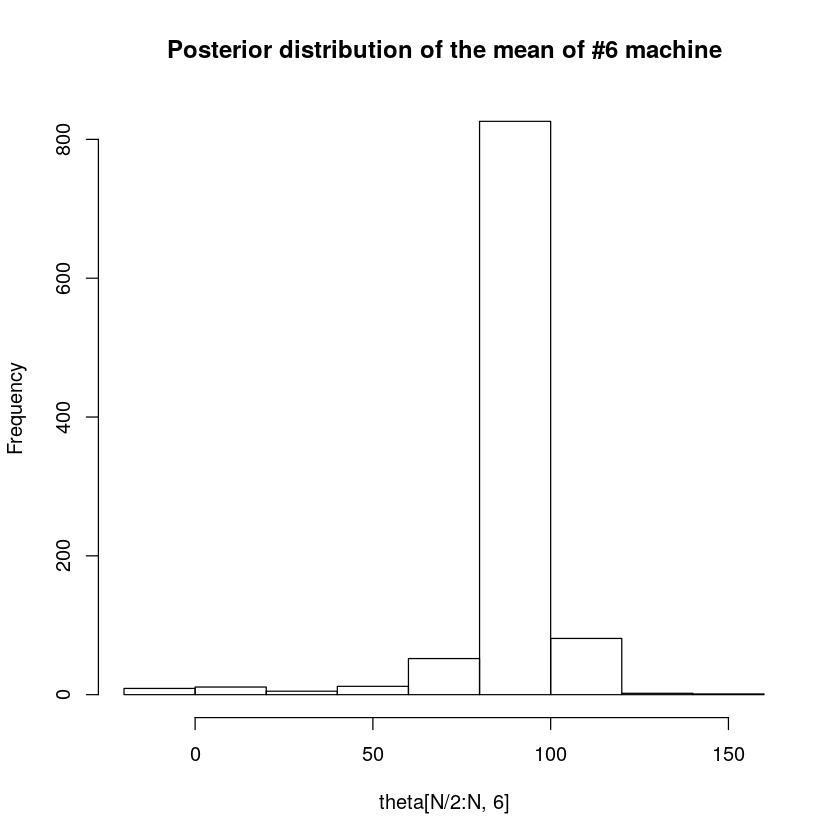

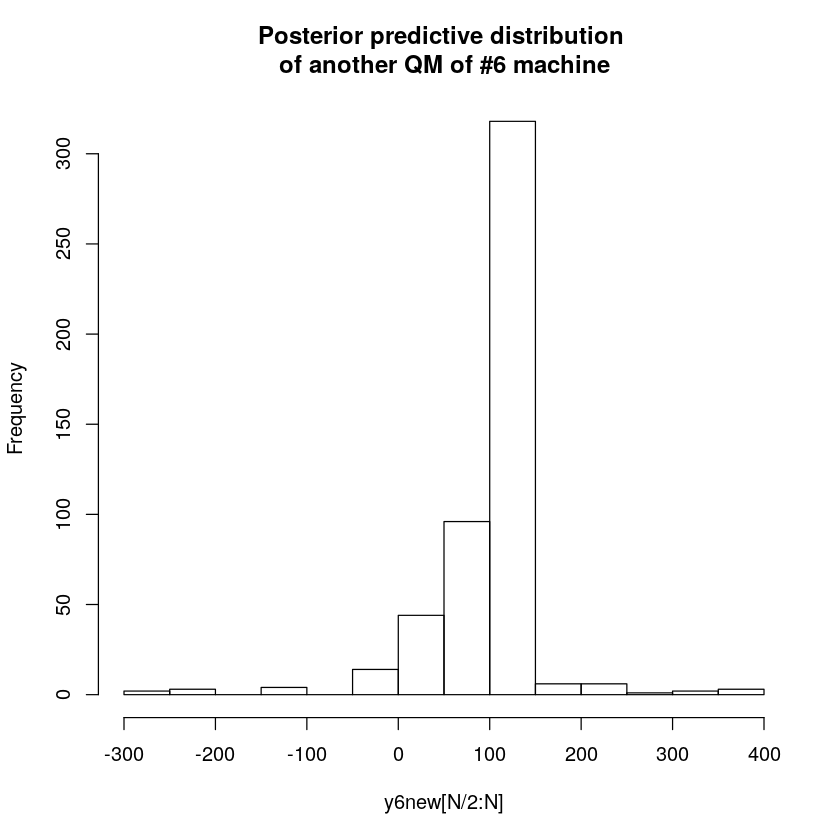

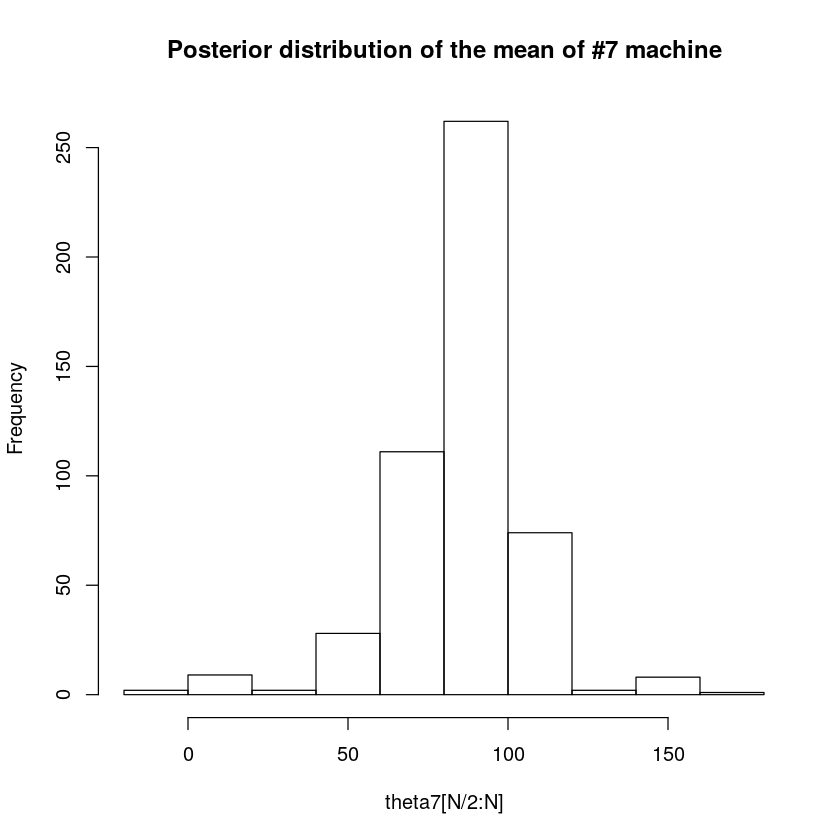

In [3]:
hist(theta[N/2:N,6],main = "Posterior distribution of the mean of #6 machine")

hist(y6new[N/2:N],main = "Posterior predictive distribution 
of another QM of #6 machine")

hist(theta7[N/2:N],main = "Posterior distribution of the mean of #7 machine")

# Separate model

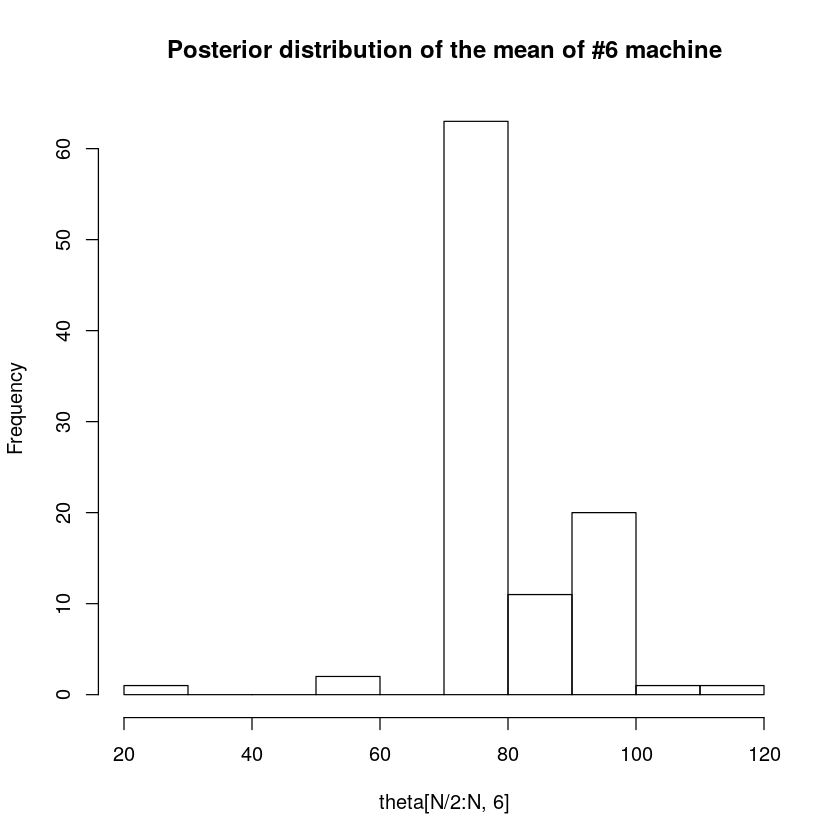

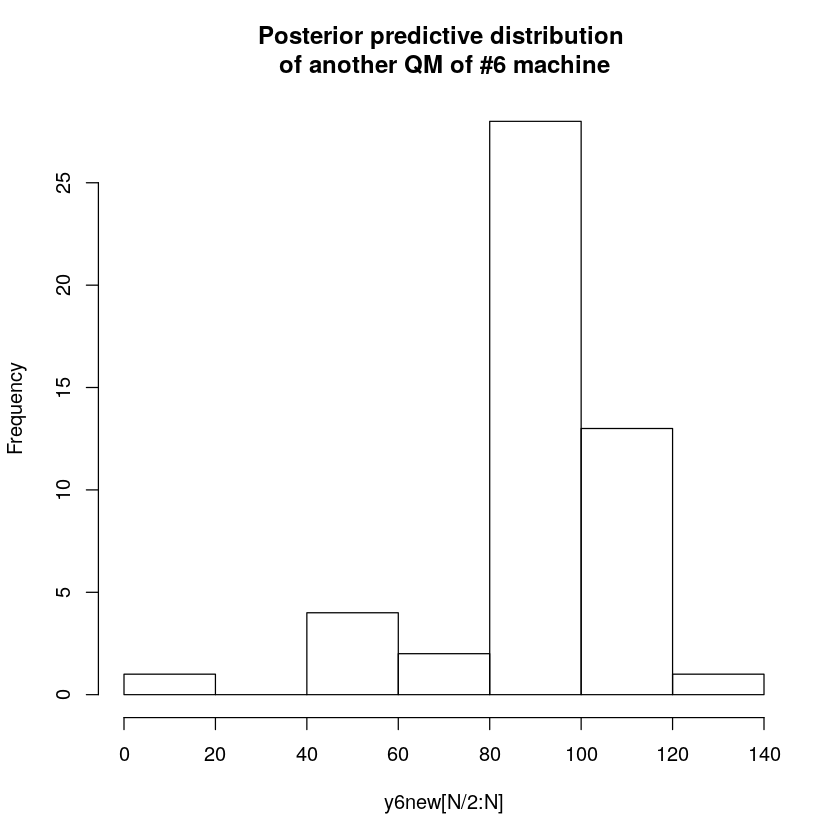

In [4]:
library(LaplacesDemon)
y <- matrix(c(83,92,92,46,67,117,109,114,104,87,101,93,92,86,67,105
              ,119,116,102,116,79,97,103,79,92,57,92,104,77,100),nrow = 5)

J <- 6
nj <- rep(5,J)
burnin <- 100
N <- 100
chain <- 5
theta <- matrix(rep(NA,(burnin+N)*6),ncol = 6)
sigmaSquare <- matrix(rep(NA,(burnin+N)*6),ncol = 6)

# initial value for theta
theta <- matrix(rep(NA,(N+burnin)*6),ncol = 6)
for(j in 1:J){
  theta[1,j] <- sample(y[,j],1)
}


for(i in 2:(burnin + N)){
    # update sigmaSquare
    for(j in 1:J){
        sigmaSquare.hat <- 1/(nj[j]-1)*sum((y[,j]-theta[i-1,j])^2)
        sigmaSquare[i,j] <-rinvchisq(1,nj[j]-1,sigmaSquare.hat)
    }
    
    # update theta
    for(j in 1:J){
        theta[i,j] <- rnorm(1,mean(y[,j]),sqrt(sigmaSquare[i,j]/nj[j]))
    }
    # sample y6new, and y7new
    y6new[i] <- rnorm(1,theta[i,6],sqrt(sigmaSquare[i,6]))
    
}

hist(theta[N/2:N,6],main = "Posterior distribution of the mean of #6 machine")

hist(y6new[N/2:N],main = "Posterior predictive distribution 
of another QM of #6 machine")


# Pooled model

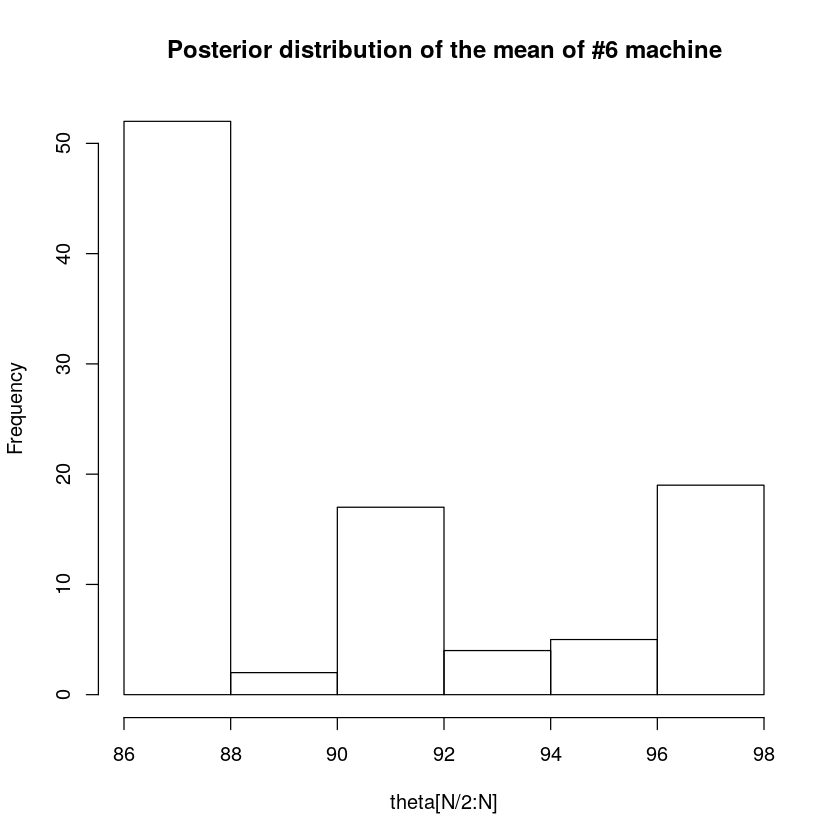

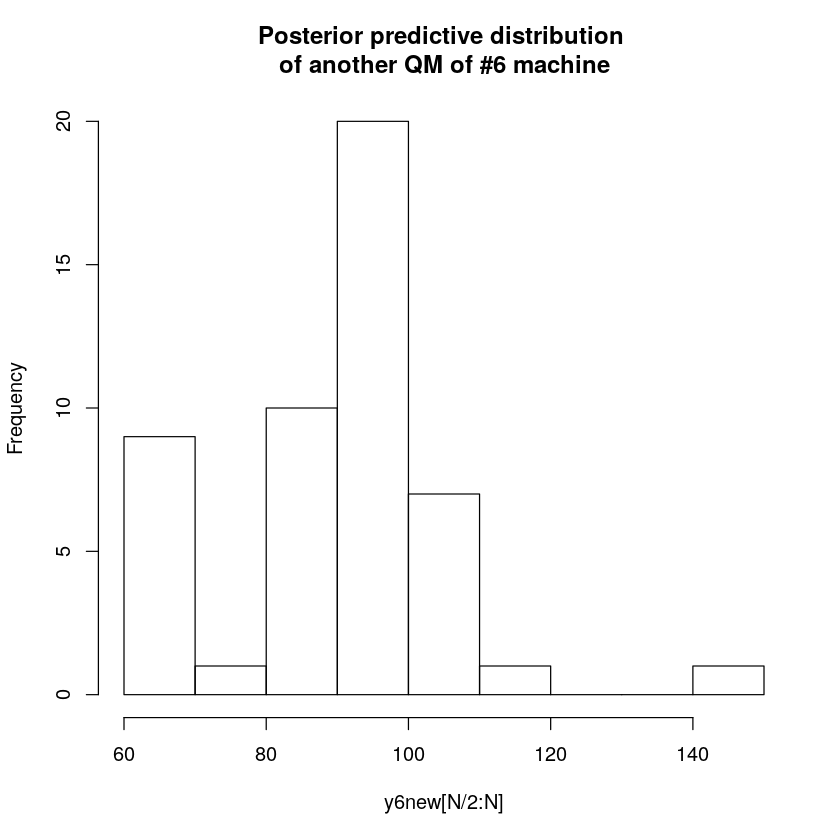

In [5]:
library(LaplacesDemon)
y <- c(83,92,92,46,67,117,109,114,104,87,101,93,92,86,67,105,119,116,102,116,79,97,103,79,92,57,92,104,77,100)

burnin <- 100
N <- 100
nj <- 5*6
chain <- 5
theta <- rep(NA,(burnin+N))
sigmaSquare <- rep(NA,(burnin+N))
theta[1] <- sample(y,1)

for(i in 2:(burnin + N)){
    # update sigmaSquare
    sigmaSquare.hat <- 1/(nj-1)*sum((y-theta[i-1])^2)
    sigmaSquare[i] <-rinvchisq(1,nj-1,sigmaSquare.hat)
    
    # update theta
    theta[i] <- rnorm(1,mean(y),sqrt(sigmaSquare[i]/nj))
    # sample y6new, and y7new
    y6new[i] <- rnorm(1,theta[i],sqrt(sigmaSquare[i]))
}
hist(theta[N/2:N],main = "Posterior distribution of the mean of #6 machine")

hist(y6new[N/2:N],main = "Posterior predictive distribution 
of another QM of #6 machine")

# References
1. [dist.Inverse.ChiSquare](https://www.rdocumentation.org/packages/LaplacesDemon/versions/16.1.1/topics/dist.Inverse.ChiSquare)
